# Capstone Analytic Report and Research Proposal

## Boston Marathon Finishers (2015 – 2017)

This dataset contains information about runners who finished the Boston Marathon in the years 2015,
2016 and 2017. The information was scraped from data provided by the Boston Athletic Association (BAA)
at the Boston Marathon website and assembled by kaggle.com user, Rojour. The data are separated into
three .csv files - one for each year. Each file contains unique identifiers, assigned race numbers, ages,
genders, places of origin (city, state, country, nationality), race times at 9 stages of the race,
official times and placements by the overall race, gender and age divisions.

The Boston Marathon is the world’s oldest and one of the most well-known marathons. Because people come from around
the world to participate (30,000 people on average), it is worth asking what kind of people participate in such a race? We can say a few things just by their participation – they are older than 18, have participated in a marathon
recognized by the International Association of Athletics Federations and have finished under BAA qualifying race times for their age and gender groups.

Before doing anything, it is important to import all required libraries. It is also important to keep them in one place - at the beginning of the notebook.

In [10]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

Now I'll use Pandas to access the three .csv data files (one for each year), and store them in the below values.

In [11]:
df2015 = pd.read_csv('finishers-boston-marathon-2015-2016-2017/marathon_results_2015.csv')
df2016 = pd.read_csv('finishers-boston-marathon-2015-2016-2017/marathon_results_2016.csv')
df2017 = pd.read_csv('finishers-boston-marathon-2015-2016-2017/marathon_results_2017.csv')

Cells without data in these tables are filled with a dash ('-'). Removing these cells would cause more problems than it would solve so I'll replace them with a time of zero, making sure to account for those cells as outliers when calculating central tendency.

In [12]:
d = {'-':'0:00:00'}
df2015 = df2015.replace(d)
df2016 = df2016.replace(d)
df2017 = df2017.replace(d)

Here is a function that converts the time string as formatted in this data to total seconds.

In [13]:
def get_sec(time_str):
    h,m,s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

Now I'll use this function to create new pace time columns (containing seconds) based on current pace time columns.

In [14]:
def conv(df, col):
    df[col + '_sec'] = [get_sec(j) for j in df[col]]
    return df[col + '_sec']

for j in ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']:
    conv(df2015, j)
    
for j in ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']:
    conv(df2016, j)
    
for j in ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']:
    conv(df2017, j)

Great! Now I can calculate some summary statistics to better understand this data set. While I could use the .describe() function for each entire data frame, some columns simply count up from '0' by divisional finishing place. That means that in these instances, measurements like the average, max or standard deviation of all participants in a division wouldn't reveal much. I'll choose the 'Age', 'Pace' and 'Official Time' columns for each year.

In [15]:
print(df2015['Age'].describe())
print(df2015['Pace_sec'].describe())
print(df2015['Official Time_sec'].describe())
print(df2016['Age'].describe())
print(df2016['Pace_sec'].describe())
print(df2016['Official Time_sec'].describe())
print(df2017['Age'].describe())
print(df2017['Pace_sec'].describe())
print(df2017['Official Time_sec'].describe())

count    26598.000000
mean        42.144823
std         11.294531
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         82.000000
Name: Age, dtype: float64
count    26598.000000
mean       518.681066
std         92.703053
min        296.000000
25%        455.000000
50%        503.000000
75%        564.000000
max       1188.000000
Name: Pace_sec, dtype: float64
count    26598.000000
mean     13585.590608
std       2428.136597
min       7757.000000
25%      11918.000000
50%      13180.000000
75%      14785.000000
max      29161.000000
Name: Official Time_sec, dtype: float64
count    26630.000000
mean        42.514044
std         11.347955
min         18.000000
25%         34.000000
50%         43.000000
75%         51.000000
max         83.000000
Name: Age, dtype: float64
count    26630.000000
mean       538.375291
std         94.084447
min        304.000000
25%        473.000000
50%        522.000000
75%        588.000000
max       1470.0000

Now I can observe some notable points of information. Age ranges and total marathon finishers appear to be somewhat standardized over the years. The fastest finish (minimum 'Official Time') was 2:09:17 (7757 seconds) in 2015. The oldest finishing runner over the years was 84 in 2017! And the fastest of the average paces over the years was 08:37 in 2015.

Next I'll look at how the best of the 2017 men's and women's divisions (#1 in 'Gender') performed across all metrics. I'll also remove some uninformative or empty columns.

In [16]:
df2017[df2017['Gender'] == 1]

cols = [col for col in df2017 if col not in ['Unnamed: 0','Unnamed: 9', 'State', 'Citizen', 'City', 'Bib', 'Proj Time']]
df2017[df2017['Gender'] == 1][cols].iloc[:,0:17]

,Name,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender
0,"Kirui, Geoffrey",24,M,KEN,0:15:25,0:30:28,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,2:09:37,1,1
20,"Kiplagat, Edna",37,F,KEN,0:17:46,0:34:58,0:51:55,1:08:50,1:12:33,1:25:51,1:42:40,1:58:41,2:14:43,0:05:25,2:21:52,21,1


I see some interesting data here. Both Kirui and Kiplagat are Kenyan. Kiplagat is significantly older than Kirui. Kiplagat appears to maintain a pace closer to Kirui at the beginning. Maybe women are able to maintain a good pace as they get older or their slower pace takes place toward the end of the race. 

I'll create some preliminary visualizations to get an even better understanding for how age is distributed across the top performing runners of each gender division. I'll plot a histogram of the 2017 top 50 overall men and women by ages to get a better look.

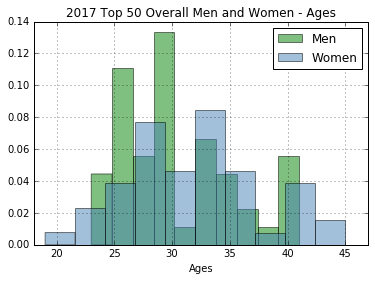

In [17]:
p1 = plt.hist(df2017['Age'][df2017['Gender'] <= 50][df2017['M/F'] == 'F'], normed=True, color='g', bins=10, alpha=.5)
p2 = plt.hist(df2017['Age'][df2017['Gender'] <= 50][df2017['M/F'] == 'M'], normed=True, color='steelblue', bins=10, alpha=.5)

plt.title('2017 Top 50 Overall Men and Women - Ages')
plt.xlim(18, 47)
plt.xlabel('Ages')
plt.grid(True)

plt.legend(('Men', 'Women'))

plt.show()

While it is far from conclusive, it appears that of the top 50 performers, men skew younger while the ages of the women in this category are slightly closer to normally distributed. Again, this suggests the possibility that age could be less influential over long distances with regard to female runners. Now I'll make some additional observations around other aspects of the data. I'll look at top country participation by counting the values for the 'Country' column and looking at the top ten countries therein.

In [18]:
Country_counts = df2017['Country'].value_counts()
Country_counts.iloc[0:10]

USA    20945
CAN     1870
GBR      425
MEX      285
CHN      242
GER      226
BRA      205
AUS      191
JPN      170
ITA      165
Name: Country, dtype: int64

The United States is a clear outlier, having over ten times more race finishers than the next most participating country, Canada. I've plotted these countries in a pie graph to get a better understanding for proportionality, removing the United States and adding Kenya (considering their aforementioned success) - to see how many runners finished overall.

In [19]:
Country_counts.loc['KEN']

8

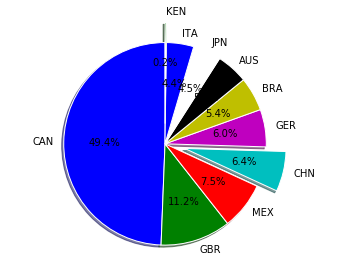

In [21]:
labels = 'CAN', 'GBR', 'MEX', 'CHN', 'GER', 'BRA', 'AUS', 'JPN', 'ITA', 'KEN'
sizes = [1870, 425, 285, 242, 226, 205, 191, 170, 165, 8]
explode = (0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.rcParams['patch.edgecolor'] = 'white'

plt.show()

Canadian and Mexican participation may be due to proximity. Taking proximity into consideration, British and Chinese participation are notable. Kenya's success is impressive considering their very limited participation.

Now that we know a bit about who these runners are, let’s ask some questions regarding race times:

### How do the best runners from each gender division perform over the course of the race?

For this plot I've compared the top two runners from each gender division ('Kirui, Geoffrey' (M) and Kiplagat, Edna (F)) by pace at 5K increments (i.e. excluding the 'Half' column). Because the paces in the data are cumulative, I had to take the absolute value of each pace (subtracting a selected pace's preceeding value from that pace). This way I was able to watch each runner as their performance unfolded over the course of the race and compare Geoffrey and Edna within the context of their own performance.

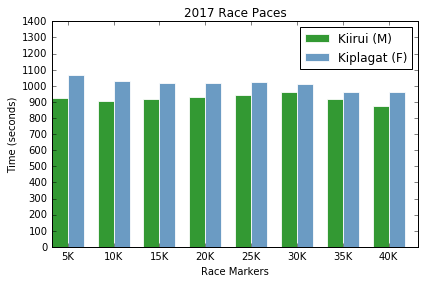

In [22]:
Geoffrey = df2017[df2017['Name'] == 'Kirui, Geoffrey'][cols].iloc[:,18:27].values.tolist()
Geoffrey_list = []
Geoffrey_list.append(0)
for j in Geoffrey[0]:
    Geoffrey_list.append(j)

del Geoffrey_list[5:6]
Geoffrey_list = [t - s for s, t in zip(Geoffrey_list, Geoffrey_list[1:])]

Edna = df2017[df2017['Name'] == 'Kiplagat, Edna'][cols].iloc[:,18:27].values.tolist()
Edna_list = []
Edna_list.append(0)
for j in Edna[0]:
    Edna_list.append(j)

del Edna_list[5:6]
Edna_list = [t - s for s, t in zip(Edna_list, Edna_list[1:])]

n_groups = 8
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, Geoffrey_list, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Kiirui (M)')
 
rects2 = plt.bar(index + bar_width, Edna_list, bar_width,
                 alpha=opacity,
                 color='steelblue',
                 label='Kiplagat (F)')
 
plt.xlabel('Race Markers')
plt.ylabel('Time (seconds)')
plt.title('2017 Race Paces')
plt.yticks(np.arange(0, 1500, 100))
plt.xticks(index + bar_width, ('5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K'))
plt.legend()


plt.tight_layout()
plt.show()

I can see that Edna was able to cut her time down consistantly over the full course of the race, while Geoffrey began to lose pace between the 15K and 30K points. Most significantly, perhaps, is the 30K mark. This is the location of the infamous "Heartbreak Hill", a 2km incline which could have slowed both runners down. Notably, however, only Geoffrey was affected. Remember that Edna is 37 and Geoffrey is 24 and yet at "Heartbreak Hill" their paces almost met.

Indeed, additional data detailing the route of the Marathon would provide additional context. For now I'll continue by looking at the pace of runners at the halfway mark. Does this pace necessarily predict success? At what point does a slower pace at the halfway mark result in a less predictable finish?

### How exactly does performance at the half of the race influence overall performance?

Here I compared all runners' paces at the halfway mark to their overall finish with a traditional scatter plot.

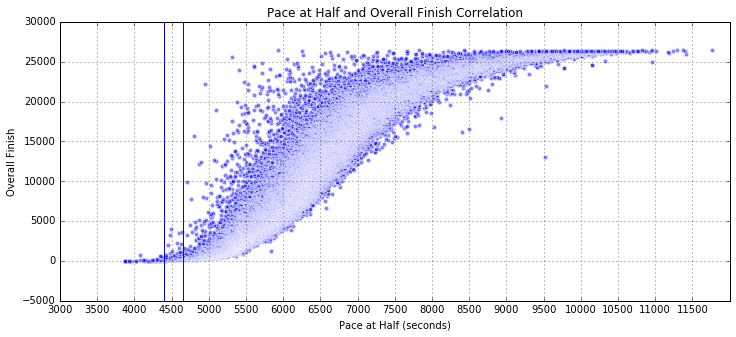

In [27]:
a = df2017['Half_sec'].values
b = df2017['Overall'].values

fig = plt.figure(figsize=(12, 5))
plt.scatter(a, b, alpha=0.5)
plt.xlim(3500, 12000)
plt.xticks(np.arange(3000, 12000, 500))
plt.axvline(x=4400)
plt.axvline(x=4650)
plt.xlabel('Pace at Half (seconds)')
plt.ylabel('Overall Finish')
plt.title('Pace at Half and Overall Finish Correlation')

plt.grid(True)
plt.show()

It appears that for a time any slower than approximately 4400 seconds (73:19), a runner's pace halfway through the race is less influential on their overall finish, suggesting a likely remarkable consistancy in pace by the top performers as exemplified by Geoffrey Kirui and Edna Kiplagat. This inconsistancy becomes especially pronounced for a time any slower than approximately 4650 seconds (77:30).

Lastly, I thought it would make sense to look at older men and women and their paces at the beginning of the race. I thought this might provide additional information regarding how particular age divisions of older runners compared.

### Finally, how do men and women of advanced ages perform over the course of a race?

To help answer this question, I took median times for three values, 'Pace', '5K' and '10K' for both male and female runners. I wanted to see how close these older men and women compared by pace when they were just beginning and fatigue was less of a contributing factor. Then I stacked two age divisions for each value and each gender, ages 75 to 79 on top of ages 55 to 59.

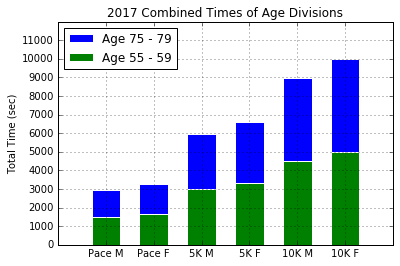

In [24]:
MT1 = df2017['5K_sec'][df2017['Age'] >= 50][df2017['Age'] <= 59][df2017['M/F'] == 'M'].median()
MT2 = df2017['5K_sec'][df2017['Age'] >= 75][df2017['Age'] <= 79][df2017['M/F'] == 'M'].median()

FT1 = df2017['5K_sec'][df2017['Age'] >= 50][df2017['Age'] <= 59][df2017['M/F'] == 'F'].median()
FT2 = df2017['5K_sec'][df2017['Age'] >= 75][df2017['Age'] <= 79][df2017['M/F'] == 'F'].median()

MT3 = df2017['10K_sec'][df2017['Age'] >= 50][df2017['Age'] <= 59][df2017['M/F'] == 'M'].median()
MT4 = df2017['10K_sec'][df2017['Age'] >= 75][df2017['Age'] <= 79][df2017['M/F'] == 'M'].median()

FT3 = df2017['10K_sec'][df2017['Age'] >= 50][df2017['Age'] <= 59][df2017['M/F'] == 'F'].median()
FT4 = df2017['10K_sec'][df2017['Age'] >= 75][df2017['Age'] <= 79][df2017['M/F'] == 'F'].median()

MT5 = df2017['15K_sec'][df2017['Age'] >= 50][df2017['Age'] <= 59][df2017['M/F'] == 'M'].median()
MT6 = df2017['15K_sec'][df2017['Age'] >= 75][df2017['Age'] <= 79][df2017['M/F'] == 'M'].median()

FT5 = df2017['15K_sec'][df2017['Age'] >= 50][df2017['Age'] <= 59][df2017['M/F'] == 'F'].median()
FT6 = df2017['15K_sec'][df2017['Age'] >= 75][df2017['Age'] <= 79][df2017['M/F'] == 'F'].median()

N = 6
older_times = (MT2, FT2, MT4, FT4, MT6, FT6)
old_times = (MT1, FT1, MT3, FT3, MT5, FT5)
ind = np.arange(N)
width = 0.60

p1 = plt.bar(ind, older_times, width, color='g', align="center")
p2 = plt.bar(ind, old_times, width, bottom=old_times, align="center")

plt.ylabel('Total Time (sec)')
plt.title('2017 Combined Times of Age Divisions')
plt.xticks(ind, ('Pace M', 'Pace F', '5K M', '5K F', '10K M', '10K F'))
plt.yticks(np.arange(0, 11001, 1000))
plt.legend((p2[0], p1[0]), ('Age 75 - 79', 'Age 55 - 59'), loc=2)

plt.grid(True)
plt.show()

Here it appears that men and women ages 55 to 59 are slightly closer in time not only to each other, but from one race section to the next. Perhaps between the ages of 75 - 79 a consistent pace is simply less attainable.

Now I will look at inference based on p-values as a final way to explore this area of age and performance.

### Statistical Test: What age divisions are significantly correlated with top performance?

For this statistical test I will look at the top (shortest duration) 25th percentile of official race times. Then I will compare how closely two samples of runners based on age (divisions 18 - 34 and 50 - 59) are correlated to that population of top official times. That is to say, whether or not they deviate with statistical significance.

In [25]:
df2017['Official Time_sec'].describe()

count    26410.000000
mean     14283.555358
std       2528.883183
min       7777.000000
25%      12499.000000
50%      13899.500000
75%      15708.000000
max      28694.000000
Name: Official Time_sec, dtype: float64

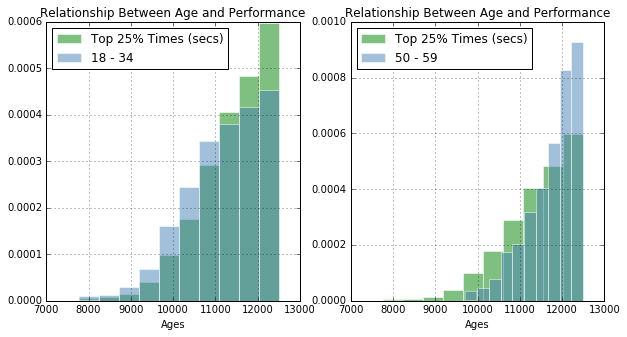

In [26]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
p1 = plt.hist(df2017['Official Time_sec'][df2017['Official Time_sec'] <= 12499], normed=True, color='g', bins=10, alpha=.5)
p2 = plt.hist(df2017['Official Time_sec'][df2017['Official Time_sec'] <= 12499][df2017['Age'] >= 18][df2017['Age'] <= 34], normed=True, color='steelblue', bins=10, alpha=.5)

plt.title('Relationship Between Age and Performance')
plt.xlabel('Ages')
plt.grid(True)
plt.legend(('Top 25% Times (secs)', '18 - 34'), loc=2)

plt.subplot(1, 2, 2)
p1 = plt.hist(df2017['Official Time_sec'][df2017['Official Time_sec'] <= 12499], normed=True, color='g', bins=10, alpha=.5)
p2 = plt.hist(df2017['Official Time_sec'][df2017['Official Time_sec'] <= 12499][df2017['Age'] >= 50][df2017['Age'] <= 59], normed=True, color='steelblue', bins=10, alpha=.5)

plt.title('Relationship Between Age and Performance')
plt.xlabel('Ages')
plt.grid(True)
plt.legend(('Top 25% Times (secs)', '50 - 59'), loc=2)

plt.show()

In [9]:
sample1 = np.random.choice(df2017['Official Time_sec'][df2017['Official Time_sec'] <= 12499].values, 100, replace=True)
sample2 = np.random.choice(df2017['Official Time_sec'][df2017['Official Time_sec'] <= 12499][df2017['Age'] >= 18][df2017['Age'] <= 34].values, 100, replace=True)

sample3 = np.random.choice(df2017['Official Time_sec'][df2017['Official Time_sec'] <= 12499].values, 100, replace=True)
sample4 = np.random.choice(df2017['Official Time_sec'][df2017['Official Time_sec'] <= 12499][df2017['Age'] >= 50][df2017['Age'] <= 59].values, 100, replace=True)

print(ttest_ind(sample2, sample1, equal_var=False))
print(ttest_ind(sample4, sample3, equal_var=False))

Ttest_indResult(statistic=-1.2675246712949484, pvalue=0.20646069993384933)
Ttest_indResult(statistic=2.8367199079174927, pvalue=0.0050862551176454242)


We can see that with a the a p-value of .05 used as a criterion for statistical significance, the top performers from ages 18 to 34 are far more correlated with the overall top performers than are runners from the age division of 50 to 59 year olds.

### Future Research Project and Questions

For future research on the Boston Marathon, I propose continuing to gather yearly finishing runner data for the Boston Marathon and other marathons for training a machine learning case-based reasoning model to predict the following:

1. What is a returning individual runner's achievable optimal official time given their previous performance?

In order to arrive a the answer, I would look at past examples of runners of a similar profile to my subject runner (gender, age, pace times, official times), specifically who subsequently went on to outperform their previous best. I would look at how much my subject runner deviated from these past examples and what degree of improvements could be made at what stages. Additional data ingested by the model would provide additional example runners and further inform changes that could be made by my subject runner.